# Autoencoder with CNN

Current state of the 475 project that creates an Autoencoder with CNN layers
Currently on a custom dataset that has packet captures from documented Malware and Benign applications  
Trains on sequences of flows from CIC-IDS2018

### 1. Load model for evaluation

In [1]:
from processing.CSE_CIC_processing import process_CIC_CAE

process_CIC_CAE()

Total number of unique labels: 4
Occurrences of each label:
Benign: 381
DoS attacks-Hulk: 8300
DoS attacks-SlowHTTPTest: 91434
FTP-BruteForce: 99885
Initial number of columns: 76, final number of columns: 65
Initial number of rows: 200000, final number of rows: 195668
Input batch shape from DataLoader: torch.Size([32, 1, 64, 64])
Labels batch shape from DataLoader: torch.Size([32])
Saved dataloaders to C:/Users/theob/Code/COS-475-Project/Dataset/CSE-CIC-IDS2018/


In [2]:
import torch 
from conf import * 

model_name = "CAE"
model = torch.load(f'models/checkpoints/{model_name}.pth')


datasets = ['CSE-CIC/flows',]
dataset = datasets[0]

train_loader = torch.load(os.path.join(data_dir,dataset,'train.pt'))
test_loader = torch.load(os.path.join(data_dir,dataset,'test.pt'))



cuda starting:  True


### Evaluate

In [3]:
from eval.evaluate import AnomalyDetection
print("Import successful!")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("cuda starting: ",torch.cuda.is_available())

Import successful!
cuda starting:  True


Threshold: 0.0000, Accuracy: 2.14%
Threshold: 0.0001, Accuracy: 2.14%
Threshold: 0.0001, Accuracy: 2.14%
Threshold: 0.0002, Accuracy: 2.14%
Threshold: 0.0002, Accuracy: 2.14%
Threshold: 0.0003, Accuracy: 2.10%
Threshold: 0.0004, Accuracy: 2.06%
Threshold: 0.0004, Accuracy: 2.02%
Threshold: 0.0005, Accuracy: 1.99%
Threshold: 0.0006, Accuracy: 1.54%
Threshold: 0.0006, Accuracy: 1.14%
Threshold: 0.0007, Accuracy: 0.86%
Threshold: 0.0007, Accuracy: 0.62%
Threshold: 0.0008, Accuracy: 0.45%
Threshold: 0.0009, Accuracy: 0.30%
Threshold: 0.0009, Accuracy: 0.22%
Threshold: 0.0010, Accuracy: 0.15%
Threshold: 0.0010, Accuracy: 0.08%
Threshold: 0.0011, Accuracy: 0.04%
Threshold: 0.0012, Accuracy: 0.03%
Threshold: 0.0012, Accuracy: 0.03%
Threshold: 0.0013, Accuracy: 0.02%
Threshold: 0.0013, Accuracy: 0.02%
Threshold: 0.0014, Accuracy: 0.02%
Threshold: 0.0015, Accuracy: 0.02%
Threshold: 0.0015, Accuracy: 0.02%
Threshold: 0.0016, Accuracy: 0.02%
Threshold: 0.0017, Accuracy: 0.02%
Threshold: 0.0017, A

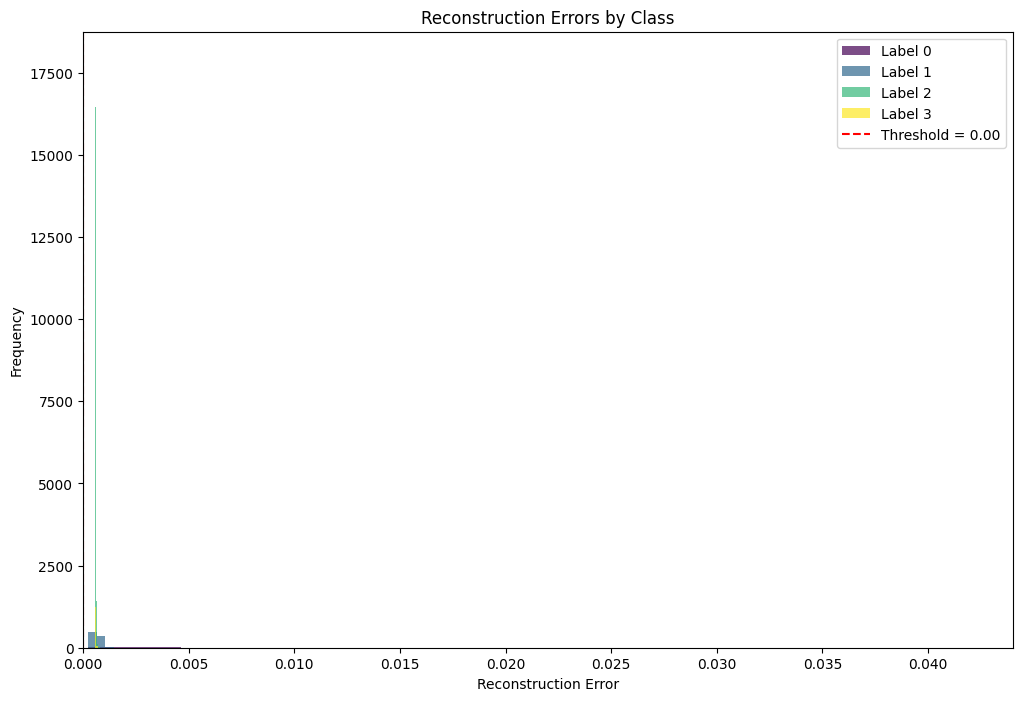

In [4]:
# Create an instance of the AnomalyDetector class
detector = AnomalyDetection(model, test_loader, device)

# Run the analysis
detector.run_analysis()

### Visualize sample inputs and reconstructed output side by side

c:\Users\theob\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


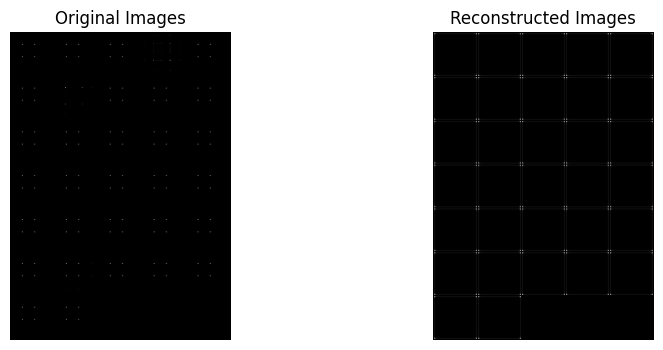

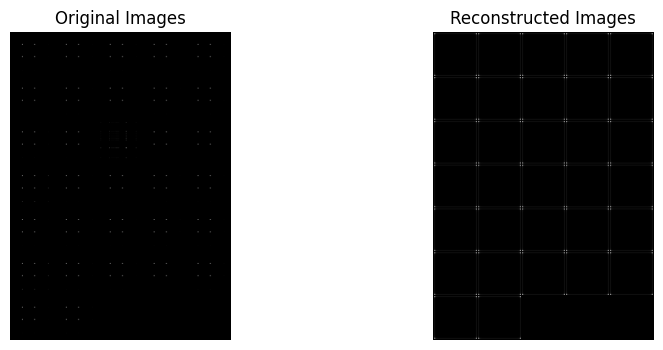

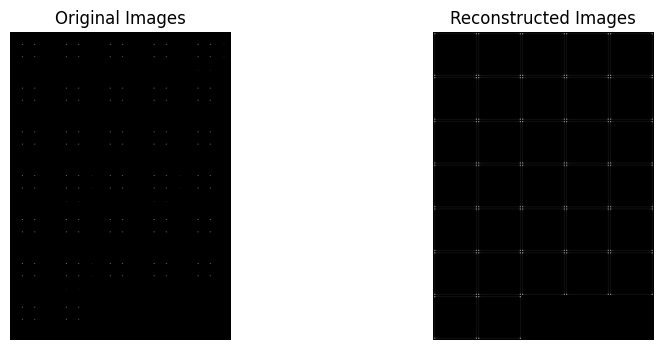

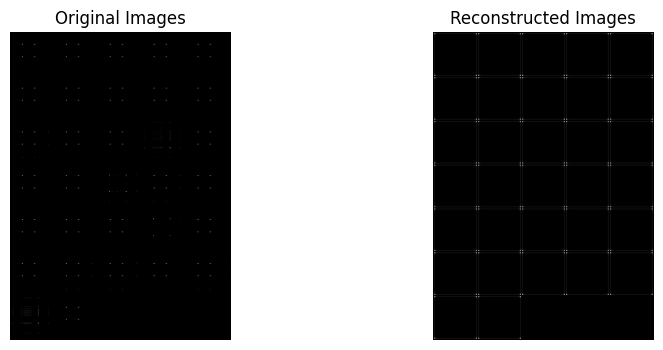

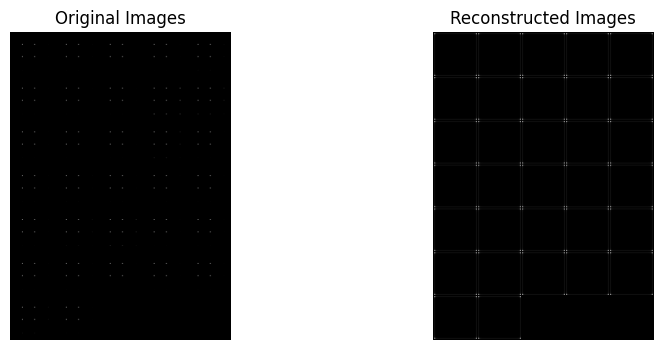

In [5]:
from visualization.visualize_CAE_constructions import visualize_reconstructions

visualize_reconstructions(model, test_loader, device='cuda', num_samples=5)